# Data processing

In [1]:
!nvidia-smi

Thu Apr 22 18:56:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.06    Driver Version: 450.51.06    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Download efficientnets 
!pip install keras_efficientnets 

In [3]:
#Keras Applications is the applications module of the Keras deep learning library. It provides model definitions and pre-trained weights for a number of popular archictures, such as VGG16, ResNet50, Xception, MobileNet, and more.
!pip install Keras-Applications

     |████████████████████████████████| 50 kB 272 kB/s 


In [4]:
#importing other required libraries
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from tqdm import tqdm
import shutil
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#Onehot Encoding the labels.
from sklearn.utils.multiclass import unique_labels
import albumentations
from sklearn.metrics import classification_report, confusion_matrix



# tensoflow models
import tensorflow as tf
from keras import Sequential
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from keras_efficientnets import EfficientNetB0
from keras.utils import to_categorical

In [5]:
# creat folder
os.makedirs("./self_cas_study", exist_ok=True)

In [6]:
# the train set metadata, with one row for each object, including a class and a bounding box. 
df_train = pd.read_csv('../input/vinbigdata-chest-xray-abnormalities-detection/train.csv') 
print(df_train.shape)
df_train.head()

(67914, 8)


,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN


In EDA we created files which stores the 15000 images and its respective class. Images is lables as '1' if No lung diseases find in image and '0' if images aslung diseases

In [7]:
#load classfication.csv file
df = pd.read_csv('../input/personil/classfication.csv') 
print(df.shape)
df.head()

(15000, 2)


,target,img_path
0,1,../input/vinbigdata/train/000434271f63a053c412...
1,1,../input/vinbigdata/train/00053190460d56c53cc3...
2,0,../input/vinbigdata/train/0005e8e3701dfb1dd93d...
3,1,../input/vinbigdata/train/0006e0a85696f6bb578e...
4,0,../input/vinbigdata/train/0007d316f756b3fa0bae...


**This model takes input images of shape (224, 224, 3)**

In [8]:
# Specify image size
IMG_WIDTH = 224
IMG_HEIGHT = 224
CHANNELS = 3

In [9]:
# load the test samples
test_df = pd.read_csv('../input/vinbigdata-chest-xray-abnormalities-detection/sample_submission.csv') 

In [10]:
# add .png to images id
def append_ext(fn):
  return fn+".png"
test_df["img_id"]=test_df["image_id"].apply(append_ext)

In [11]:
test_df.head()

,image_id,PredictionString,img_id
0,002a34c58c5b758217ed1f584ccbcfe9,14 1 0 0 1 1,002a34c58c5b758217ed1f584ccbcfe9.png
1,004f33259ee4aef671c2b95d54e4be68,14 1 0 0 1 1,004f33259ee4aef671c2b95d54e4be68.png
2,008bdde2af2462e86fd373a445d0f4cd,14 1 0 0 1 1,008bdde2af2462e86fd373a445d0f4cd.png
3,009bc039326338823ca3aa84381f17f1,14 1 0 0 1 1,009bc039326338823ca3aa84381f17f1.png
4,00a2145de1886cb9eb88869c85d74080,14 1 0 0 1 1,00a2145de1886cb9eb88869c85d74080.png


In [12]:
# adding .png to image index
df['img_id']= df.img_path.str.split('/',expand=True)[4]

In [13]:
#x_train,x_val= train_test_split(df,test_size=0.25,shuffle=True,stratify=df.target)

In [14]:
#Verifying the dimension after one hot encoding
#print(x_train.shape)
#print(x_val.shape)

In [15]:
'''DATA_PATH = '/content/drive/MyDrive/self case study 2/train'
output_path= '/content/drive/MyDrive/self case study 2/'
def process_data(data,data_type='train_img'):
  for _,row in tqdm(data.iterrows(),total=len(data)):
    image_name= row['img_id']
    shutil.copyfile(os.path.join(DATA_PATH,image_name),os.path.join(output_path,f'{data_type}/{image_name}'))'''

"DATA_PATH = '/content/drive/MyDrive/self case study 2/train'\noutput_path= '/content/drive/MyDrive/self case study 2/'\ndef process_data(data,data_type='train_img'):\n  for _,row in tqdm(data.iterrows(),total=len(data)):\n    image_name= row['img_id']\n    shutil.copyfile(os.path.join(DATA_PATH,image_name),os.path.join(output_path,f'{data_type}/{image_name}'))"

In [16]:
#process_data(x_train,data_type='train_img') 
#process_data(x_val,data_type='val_img') 

**Image augmentation**

In [17]:
# we are applying data image augmentation
datagen= ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   featurewise_center=True,
                                   featurewise_std_normalization=True,
                                   brightness_range=[0.3,0.6],
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   fill_mode="wrap",rescale=1/255., validation_split=0.2)

In [18]:
train_generator = datagen.flow_from_dataframe(dataframe=df, directory='../input/vinbigdata/train',
                                             x_col='img_id',
                                             y_col='target',
                                             class_mode='raw',
                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                             batch_size=64,
                                             subset='training',seed=42,shuffle=True)
validation_generator = datagen.flow_from_dataframe(dataframe=df, directory='../input/vinbigdata/train',
                                             x_col='img_id',
                                             y_col='target',
                                             class_mode='raw',
                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                             batch_size=64,
                                             subset='validation',seed=42,shuffle=False)

Found 12000 validated image filenames.
Found 3000 validated image filenames.


In [19]:
# create pipleline on test data
test_datagen = ImageDataGenerator(rescale=1/255)
test_generator=test_datagen.flow_from_dataframe(dataframe=test_df,directory="../input/vinbigdata/test",
                                           x_col="img_id",
                                           y_col=None,
                                           batch_size=1,seed=42,shuffle=False,
                                           target_size=(IMG_WIDTH, IMG_HEIGHT),
                                           class_mode=None)

Found 3000 validated image filenames.


# Training a model from scratch

In [20]:
NUM_CLASSES = 2
#Defining the model
model= Sequential()
base_model = EfficientNetB0(include_top=False, weights="imagenet", input_shape=(IMG_WIDTH, IMG_HEIGHT, 3),classes=NUM_CLASSES)
model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation=('relu'))) 
model.add(Dropout(.3))
model.add(Dense(128,activation=('relu')))
model.add(Dropout(.2))
model.add(Dense(2,activation=('softmax'))) 

#Model summary
model.summary()

16719872/16717576 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 7, 7, 1280)        4049564   
_________________________________________________________________
flatten (Flatten)            (None, 62720)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               16056576  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________

In [21]:
#Defining the parameters
batch_size= 100
#learn_rate=.001
#sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False) 
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["acc"])

In [22]:
train_steps = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

In [23]:
os.makedirs("self_cas_study/models", exist_ok=True)
train_steps = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

# check points
checkpointer = ModelCheckpoint('self_cas_study/models/best_model.h5',monitor='val_acc',verbose=1,save_best_only=True,save_weights_only=True)

history = model.fit(train_generator,steps_per_epoch=train_steps,verbose =2,epochs=20,validation_data=validation_generator,validation_steps=validation_steps,callbacks = [checkpointer])

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
187/187 - 400s - loss: 0.4898 - acc: 0.8265 - val_loss: 7.5468 - val_acc: 0.7092

Epoch 00001: val_acc improved from -inf to 0.70924, saving model to self_cas_study/models/best_model.h5
Epoch 2/20
187/187 - 269s - loss: 0.2654 - acc: 0.8923 - val_loss: 0.4969 - val_acc: 0.8662

Epoch 00002: val_acc improved from 0.70924 to 0.86617, saving model to self_cas_study/models/best_model.h5
Epoch 3/20
187/187 - 269s - loss: 0.2252 - acc: 0.9083 - val_loss: 0.2652 - val_acc: 0.8835

Epoch 00003: val_acc improved from 0.86617 to 0.88349, saving model to self_cas_study/models/best_model.h5
Epoch 4/20
187/187 - 268s - loss: 0.2152 - acc: 0.9163 - val_loss: 0.2897 - val_acc: 0.8723

Epoch 00004: val_acc did not improve from 0.88349
Epoch 5/20
187/187 - 267s - loss: 0.2085 - acc: 0.9196 - val_loss: 0.2043 - val_acc: 0.9151

Epoch 00005: val_acc improved from 0.88349 to 0.91508, saving model to self_cas_study/models/best_model.h5
Epoch 6/20
187/187 - 267s - loss: 0.1902 - acc: 0.9270 - val

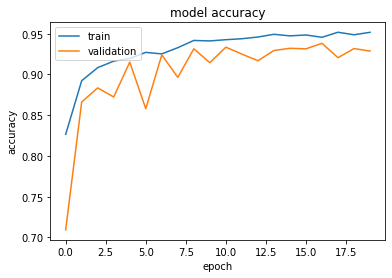

In [24]:
def plot_hist(hist):
  plt.plot(hist.history["acc"])
  plt.plot(hist.history["val_acc"])
  plt.title("model accuracy")
  plt.ylabel("accuracy")
  plt.xlabel("epoch")
  plt.legend(["train", "validation"], loc="upper left")
  plt.show()
plot_hist(history)

# Evaluation

In [25]:
# Evaluate the model 
loss, acc = model.evaluate_generator(validation_generator,validation_steps)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [26]:
# let's lookinto accuracy and log-loss 
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))
print("Restored model, log-loss {}:".format(loss))

Restored model, accuracy: 93.17%
Restored model, log-loss 0.18241988122463226:


In [27]:
# Let's predict on validation data 
true_lables = validation_generator.labels
batch_size = 32
nb_validation_samples = 3000
steps = nb_validation_samples / batch_size
predictions = model.predict_generator(validation_generator, steps,verbose=1)
y_pred = np.array([np.argmax(x) for x in predictions])

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


93/93 [==============================] - 55s 573ms/step


In [28]:
# creat data frame with ture values and predict values 
val_files = validation_generator.filenames
val_compare = pd.DataFrame({"Filename":val_files,"Abnormal":predictions[:,0],"Normal":predictions[:,1],"Ture_lab":true_lables}) 

In [29]:
# lets plot confusion matrix
def plot_confusion_matrix(test_y, predict_y):
  C = confusion_matrix(test_y, predict_y)
  A =(((C.T)/(C.sum(axis=1))).T)
  #divid each element of the confusion matrix with the sum of elements in that column 
  B =(C/C.sum(axis=0))
  labels = [0,1]
  # representing A in heatmap format
  print("-"*20, "Confusion matrix", "-"*20)
  plt.figure(figsize=(8,8))
  sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
  plt.xlabel('Predicted Class')
  plt.ylabel('Original Class')
  plt.show()

-------------------- Confusion matrix --------------------


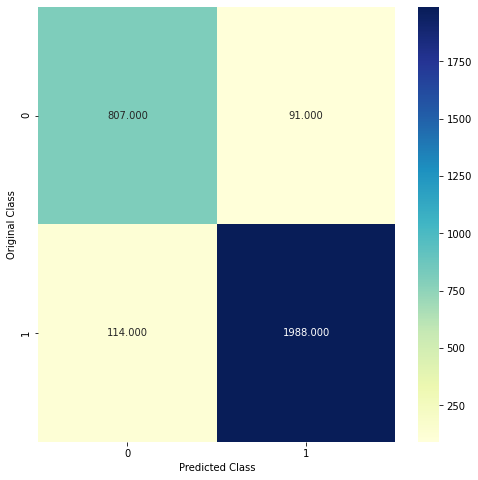

In [30]:
plot_confusion_matrix(true_lables, y_pred)

In [31]:
# Let see visual image how model is performing 
def Human_evaluation(img_id):
  dataset_dir = '../input/vinbigdata/train'
  # Define the paths to the training and testing dicom folders respectively
  ture_data = df_train[df_train['image_id'] ==img_id]
  img_path = append_ext(img_id)
  pre_data = val_compare[val_compare['Filename'] == img_path ]
  ture_class = ture_data.class_name.unique().tolist() 
  print("Ture image class are {}".format(ture_class))
  print("Probability that a person with Abnormal lung condition: {:5.2f}%".format(pre_data.Abnormal.iloc[0]*100))
  print("Probability that a person with Normal lung condition: {:5.2f}%".format(pre_data.Normal.iloc[0]*100)) 
  path = os.path.join(dataset_dir,img_path)
  img = mpimg.imread(path)
  plt.imshow(img,cmap="gray")

Ture image class are ['Pulmonary fibrosis', 'Pleural thickening', 'Cardiomegaly', 'Aortic enlargement', 'ILD']
Probability that a person with Abnormal lung condition: 86.15%
Probability that a person with Normal lung condition: 13.85%


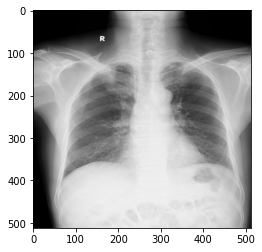

In [32]:
Human_evaluation("0007d316f756b3fa0baea2ff514ce945")

# Prediction

In [33]:
# Load the previously saved weights
model.load_weights('./self_cas_study/models/best_model.h5')

In [34]:
# Let's predict on  test data 
filenames = test_generator.filenames
predict = model.predict_generator(test_generator,steps =len(filenames),verbose=1) 

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


3000/3000 [==============================] - 50s 16ms/step


In [35]:
results=pd.DataFrame({"Filename":filenames,"Abnormal":predict[:,0],"Normal":predict[:,1]}) 
results.to_csv('predection.csv')

In [36]:
# Let's see how model is perfoming on unseen images 
def image_prediction(img_id):
  dataset_dir = '../input/vinbigdata/test'
  img_path = append_ext(img_id)
  pre_data = results[results['Filename'] == img_path ]
  print("Probability that a person with Abnormal lung condition: {:5.2f}%".format(pre_data.Abnormal.iloc[0]*100))
  print("Probability that a person with Normal lung condition: {:5.2f}%".format(pre_data.Normal.iloc[0]*100)) 
  path = os.path.join(dataset_dir,img_path)
  img = mpimg.imread(path)
  plt.imshow(img,cmap="Spectral")

Probability that a person with Abnormal lung condition: 99.74%
Probability that a person with Normal lung condition:  0.26%


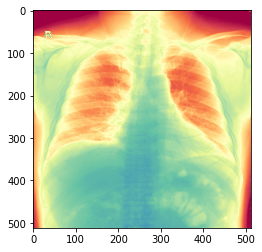

In [37]:
image_prediction('00a2145de1886cb9eb88869c85d74080')